In [45]:
import pandas as pd
import numpy as np

In [46]:
data= pd.read_csv("HAYES_ROTH.csv")
data.head()
data.drop(columns=['Name','Class'], inplace=True)

In [47]:
data.head()

,Hobby,Age,Educational_Level,Marital_Status
0,2,1,3,2
1,3,1,4,1
2,2,4,2,2
3,1,1,3,4
4,1,1,3,2


In [48]:
def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2) ** 2))
def cosine_distance(point1, point2):
    dot_product = np.dot(point1, point2)
    norm_point1 = np.linalg.norm(point1)
    norm_point2 = np.linalg.norm(point2)
    return 1 - (dot_product / (norm_point1 * norm_point2))




In [49]:
data_np = data.to_numpy()
n = data_np.shape[0]
euclidean_dist_matrix = np.zeros((n, n))
cosine_dist_matrix = np.zeros((n, n))

for i in range(n):
    for j in range(n):
        euclidean_dist_matrix[i, j] = euclidean_distance(data_np[i], data_np[j])
        cosine_dist_matrix[i, j] = cosine_distance(data_np[i], data_np[j])
#O(N^2*features) complexity
print("Euclidean Distance Matrix:\n", euclidean_dist_matrix)
print("Cosine Distance Matrix:\n", cosine_dist_matrix)

Euclidean Distance Matrix:
 [[0.         1.73205081 3.16227766 ... 2.         2.23606798 2.        ]
 [1.73205081 0.         3.87298335 ... 3.         3.16227766 3.31662479]
 [3.16227766 3.87298335 0.         ... 2.44948974 3.31662479 3.16227766]
 ...
 [2.         3.         2.44948974 ... 0.         2.64575131 2.        ]
 [2.23606798 3.16227766 3.31662479 ... 2.64575131 0.         1.        ]
 [2.         3.31662479 3.16227766 ... 2.         1.         0.        ]]
Cosine Distance Matrix:
 [[-2.22044605e-16  4.74206556e-02  1.98216274e-01 ...  1.05572809e-01
   1.47987133e-01  1.05572809e-01]
 [ 4.74206556e-02  0.00000000e+00  2.72607033e-01 ...  1.47987133e-01
   2.04953608e-01  2.08845195e-01]
 [ 1.98216274e-01  2.72607033e-01  1.11022302e-16 ...  4.38171125e-02
   2.19279942e-01  1.63339973e-01]
 ...
 [ 1.05572809e-01  1.47987133e-01  4.38171125e-02 ...  2.22044605e-16
   2.65153077e-01  2.00000000e-01]
 [ 1.47987133e-01  2.04953608e-01  2.19279942e-01 ...  2.65153077e-01
   1.110

In [50]:

def diana(distance_matrix, k):
    n = len(distance_matrix)
    clusters = [list(range(n))]
    cluster_history = []
    temp =[]
    for i in clusters:
        temp.append(len(i))
    cluster_history.extend([temp])
    while len(clusters) < k:
        
        # Find cluster with largest diameter
        diameters = []
        for c in clusters:
            if len(c) > 1:
                max_d = 0
                for i in c:
                    for j in c:
                        if i != j and distance_matrix[i][j] > max_d:
                            max_d = distance_matrix[i][j]
                diameters.append(max_d)
            else:
                diameters.append(0)
        idx = diameters.index(max(diameters))
        to_split = clusters.pop(idx)
        
        avg_dissim = []
        for i in to_split:
            s = 0
            for j in to_split:
                s += distance_matrix[i][j]
            avg_dissim.append(s / len(to_split))
        seed_idx = avg_dissim.index(max(avg_dissim))
        seed = to_split[seed_idx]
        new_cluster = [seed]
        old_cluster = [i for i in to_split if i != seed]
       
        doagain = True
        while doagain:
            doagain = False
            for i in old_cluster[:]:
                d_new = sum(distance_matrix[i][j] for j in new_cluster) / len(new_cluster)
                others = [j for j in old_cluster if j != i]
                if others:
                    d_old = sum(distance_matrix[i][j] for j in others) / len(others)
                else:
                    d_old = float('inf')
                if d_new < d_old:
                    new_cluster.append(i)
                    old_cluster.remove(i)
                    doagain = True
        if old_cluster:
            clusters.append(old_cluster)
        if new_cluster:
            clusters.append(new_cluster)
        temp =[]
        for i in clusters:
            temp.append(len(i))
        cluster_history.extend([temp])
       
    return clusters, cluster_history

def cluster_diameters(clusters, dist_matrix):
    diameters = []
    for c in clusters:
        if len(c) > 1:
            max_d = 0
            for i in c:
                for j in c:
                    if i != j and dist_matrix[i][j] > max_d:
                        max_d = dist_matrix[i][j]
            diameters.append(max_d)
        else:
            diameters.append(0)
    return diameters

def divisive_coefficient(clusters, dist_matrix):
    max_diam = 0
    for c in clusters:
        if len(c) > 1:
            for i in c:
                for j in c:
                    if i != j and dist_matrix[i][j] > max_diam:
                        max_diam = dist_matrix[i][j]
    overall_max = 0
    n = len(dist_matrix)
    for i in range(n):
        for j in range(n):
            if i != j and dist_matrix[i][j] > overall_max:
                overall_max = dist_matrix[i][j]
    dc = (max_diam / overall_max)
    return dc


In [51]:
kz=[2, 3, 4]

for k in kz:
    metric="Euclidean"
    dist_matrix=euclidean_dist_matrix
    clusters,cluster_history = diana(dist_matrix, k)
    diameters = cluster_diameters(clusters, dist_matrix)
    print(f"K={k} Clusters: {clusters}")
    for i in range(len(clusters)):
        print(f"No of points in cluster {i+1}: {len(clusters[i])}")
    print(f"Diameters: {diameters}")
    print(f"Divisive Coefficient: {divisive_coefficient(clusters, dist_matrix)}")
    print("\n")

print("\n\n")
for k in kz:
    metric="Cosine"
    dist_matrix=cosine_dist_matrix
    clusters,cluster_history = diana(dist_matrix, k)
    diameters = cluster_diameters(clusters, dist_matrix)
    print(f"K={k} Clusters: {clusters}")
    for i in range(len(clusters)):
        print(f"No of points in cluster {i+1}: {len(clusters[i])}")
    print(f"Diameters: {diameters}")
    print(f"Divisive Coefficient: {divisive_coefficient(clusters, dist_matrix)}")
    print("\n")
    print(cluster_history)

K=2 Clusters: [[2, 6, 7, 8, 9, 11, 13, 15, 16, 17, 19, 20, 21, 22, 23, 24, 25, 28, 29, 30, 31, 32, 33, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 48, 49, 50, 51, 52, 53, 55, 56, 57, 60, 62, 64, 74, 75, 76, 77, 78, 82, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 98, 99, 101, 102, 104, 105, 106, 107, 108, 109, 111, 112, 113, 114, 117, 119, 120, 123, 124, 125, 127, 128, 129, 130, 131], [97, 1, 3, 5, 10, 14, 18, 27, 54, 58, 59, 61, 65, 66, 67, 68, 69, 70, 71, 72, 73, 79, 80, 81, 100, 103, 110, 115, 116, 118, 121, 122, 126, 0, 4, 12, 26, 34, 35, 47, 63, 83, 84]]
No of points in cluster 1: 89
No of points in cluster 2: 43
Diameters: [4.69041575982343, 4.69041575982343]
Divisive Coefficient: 0.8424235391742321


K=3 Clusters: [[97, 1, 3, 5, 10, 14, 18, 27, 54, 58, 59, 61, 65, 66, 67, 68, 69, 70, 71, 72, 73, 79, 80, 81, 100, 103, 110, 115, 116, 118, 121, 122, 126, 0, 4, 12, 26, 34, 35, 47, 63, 83, 84], [7, 8, 9, 11, 15, 16, 19, 20, 21, 22, 24, 25, 28, 30, 31, 32, 36, 37, 39, 40, 41, 42, 4

In [52]:
clusters,cluster_history = diana(dist_matrix, 4)

In [53]:
data=cluster_history

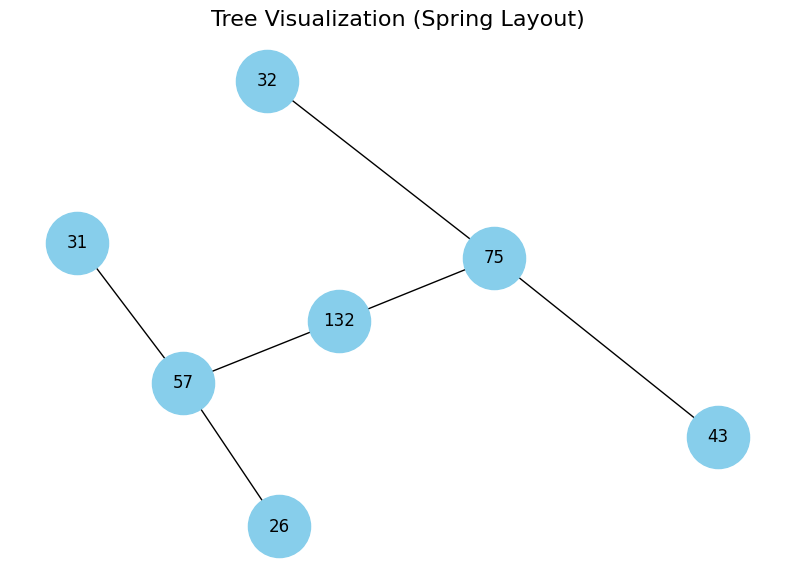

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

def build_tree_from_list(data):
    if not data or not data[0]:
        return {}
    root_val = data[0][0]
    tree = {root_val: {}}
    parent_map = {root_val: tree[root_val]}
    prev_level = set(data[0])

    for i in range(1, len(data)):
        current_level = set(data[i])
        new_nodes = current_level - prev_level
        removed_nodes = prev_level - current_level

        if len(removed_nodes) == 1:
            parent_val = removed_nodes.pop()
            if parent_val in parent_map:
                parent_dict = parent_map[parent_val]
                for node_val in new_nodes:
                    parent_dict[node_val] = {}
                    parent_map[node_val] = parent_dict[node_val]
        prev_level = current_level
        
    return tree
tree = build_tree_from_list(data)

fig, ax = plt.subplots(figsize=(10, 7))

G = nx.DiGraph()
def add_edges_from_dict(graph, parent, children_dict):
    for child, sub_children_dict in children_dict.items():
        graph.add_edge(parent, child)
        if sub_children_dict:
            add_edges_from_dict(graph, child, sub_children_dict)
root = next(iter(tree))
add_edges_from_dict(G, root, tree[root])

pos = nx.spring_layout(G, seed=42) # Fallback layout
nx.draw(G, pos, with_labels=True, arrows=   False, node_size=2000, node_color="skyblue", ax=ax, font_size=12)
ax.set_title("Tree Visualization (Spring Layout)", fontsize=16)
plt.savefig("tree_visualization.png")
plt.show()